In [2]:
import scipy.io
mat = scipy.io.loadmat('/home/rydrael/ml-course/machine-learning-ex6/ex6/ex6data2.mat')

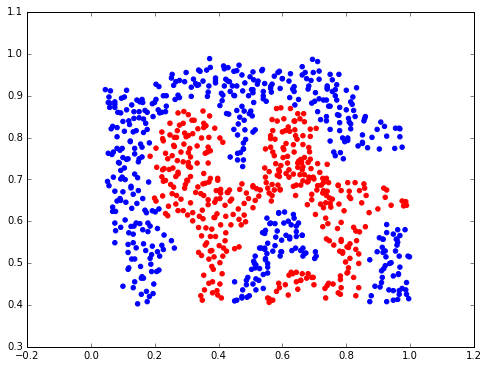

In [3]:
%matplotlib inline
X = mat['X']
y = mat['y']
colors = ["r" if i == 0 else "b" for i in y]

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color=colors)
plt.show()

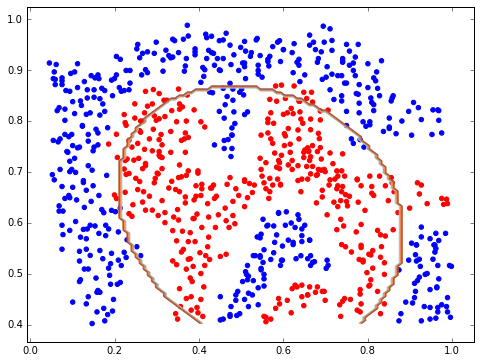

The MSE is: 0.18
0.712179056325


In [7]:
# Apply a SVC algorithm to this data
from sklearn import svm
from sklearn import utils
import numpy as np
from sklearn import cross_validation

y_ = [i 
     for a in y
     for i in a]
C = 10.0

svc = svm.SVC(kernel="rbf",  gamma=0.7, C = C)
svc.fit(X, y_)

x1plot = np.linspace(min(X[:,0]), max(X[:,0]), 100);
x2plot = np.linspace(min(X[:,1]), max(X[:,1]), 100);

xx, yy = np.meshgrid(x1plot, x2plot)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
#Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color=colors, cmap=plt.cm.Paired)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.show()

print "The MSE is: {:.2}".format(np.power(y_ - svc.predict(X), 2).mean())
scores = cross_validation.cross_val_score(svc, X, y_, cv=5)
print scores.mean()

In [14]:
#KNN

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X, y_)

from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=10)
knnr.fit(X, y_)

# Print Mean Stanrdard Error
print "The MSE is: {:.2}".format(np.power(y_ - lr.predict(X), 2).mean())
print "The MSE is: {:.2}".format(np.power(y_ - knnr.predict(X), 2).mean())

#CV
scores = cross_validation.cross_val_score(knnr, X, y_, cv=5)
print scores.mean()

scores = cross_validation.cross_val_score(lr, X, y_, cv=5)
print scores.mean()

The MSE is: 0.46
The MSE is: 0.0078
-0.00129572240263
0.451713940046


[[ 0.107143   0.60307  ]
 [ 0.093318   0.649854 ]
 [ 0.0979263  0.705409 ]
 ..., 
 [ 0.975806   0.439474 ]
 [ 0.989631   0.425439 ]
 [ 0.996544   0.414912 ]]


AttributeError: 'KNeighborsRegressor' object has no attribute 'fit_transform'

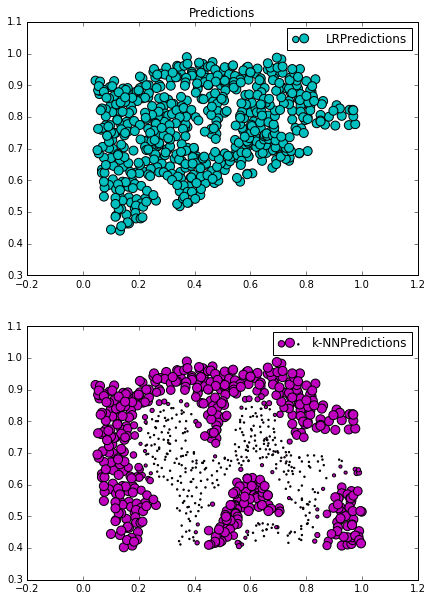

In [17]:
f, ax = plt.subplots(nrows=2, figsize=(7, 10))
ax[0].set_title("Predictions")
ax[0].scatter(X[:, 0], X[:, 1], s=lr.predict(X)*80, label='LRPredictions', color='c', edgecolors='black')
ax[1].scatter(X[:, 0], X[:, 1], s=knnr.predict(X)*80 + 2, label='k-NNPredictions', color='m', edgecolors='black')
ax[0].legend()
ax[1].legend()

print X
print knnr.fit_transform(X)


Let's do a grid search on SVC

In [5]:
from sklearn import svm
from sklearn.grid_search import GridSearchCV
y_ = [i 
     for a in y
     for i in a]
svr = svm.SVC(kernel="linear")
parameters = {'kernel':('linear', 'rbf', 'sigmoid'), 'C': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]}
gs = GridSearchCV(svr, parameters, cv=8)
gs.fit(X, y_)

GridSearchCV(cv=8, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf', 'sigmoid'), 'C': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [6]:
gs.best_params_

{'C': 10, 'kernel': 'rbf'}